In [1]:
import cdsapi

In [5]:
dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["total_precipitation"],
    "year": ["2024"],
    "month": ["12"],
    "day": [
        "01", "02", "03",
        "04"
    ],
    "time": [
        "00:00", "06:00", "12:00",
        "18:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [6, 33, -5, 42]
}

target_file = "era5_total_precipitation_dec_2024.nc"

client = cdsapi.Client()
client.retrieve(dataset, request, target_file)

2025-12-28 10:11:01,370 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-28 10:11:02,392 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2025-12-28 10:11:02,398 INFO Request ID is dfbebfe3-23e1-4cf9-a493-804f5d13e3ea
2025-12-28 10:11:02,704 INFO status has been updated to accepted
2025-12-28 10:11:17,449 INFO status has been updated to successful


'era5_total_precipitation_dec_2024.nc'

In [3]:
import xarray as xr

In [4]:
ds = xr.open_dataset("era5_total_precipitation_dec_2024.nc")
print(ds)

<xarray.Dataset> Size: 108kB
Dimensions:     (valid_time: 16, latitude: 45, longitude: 37)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 128B 2024-12-01 ... 2024-12-04T18...
  * latitude    (latitude) float64 360B 6.0 5.75 5.5 5.25 ... -4.5 -4.75 -5.0
  * longitude   (longitude) float64 296B 33.0 33.25 33.5 ... 41.5 41.75 42.0
    expver      (valid_time) <U4 256B ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 107kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-28T07:02 GRIB to CDM+CF via cfgrib-0.9.1...


In [5]:
ds["tp"]

<xarray.DataArray 'tp' (valid_time: 16, latitude: 45, longitude: 37)> Size: 107kB
[26640 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 128B 2024-12-01 ... 2024-12-04T18...
  * latitude    (latitude) float64 360B 6.0 5.75 5.5 5.25 ... -4.5 -4.75 -5.0
  * longitude   (longitude) float64 296B 33.0 33.25 33.5 ... 41.5 41.75 42.0
    expver      (valid_time) <U4 256B ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1665
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [6]:
print(ds["tp"])

<xarray.DataArray 'tp' (valid_time: 16, latitude: 45, longitude: 37)> Size: 107kB
[26640 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 128B 2024-12-01 ... 2024-12-04T18...
  * latitude    (latitude) float64 360B 6.0 5.75 5.5 5.25 ... -4.5 -4.75 -5.0
  * longitude   (longitude) float64 296B 33.0 33.25 33.5 ... 41.5 41.75 42.0
    expver      (valid_time) <U4 256B ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1665
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                  

In [7]:
import matplotlib.pyplot as plt

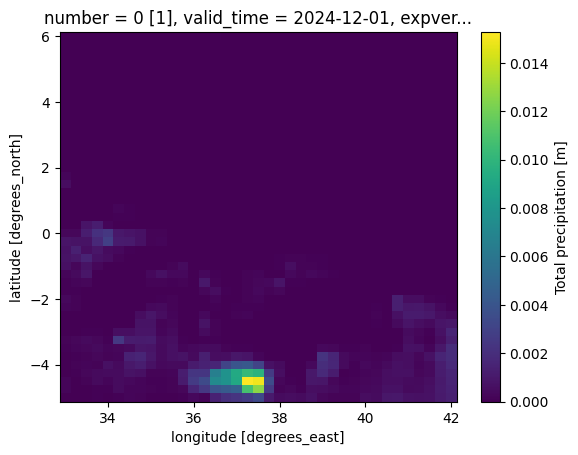

In [8]:
ds["tp"].isel(valid_time=0).plot()

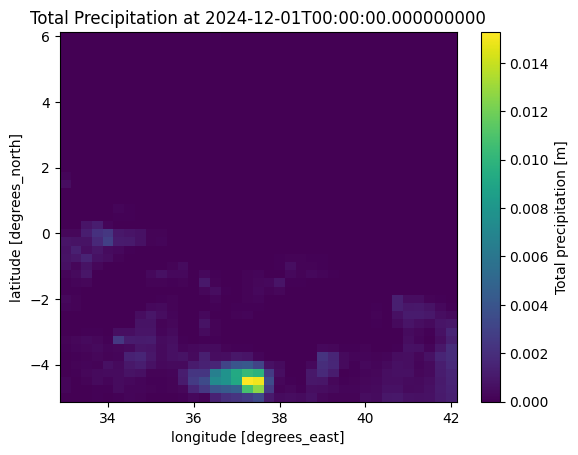

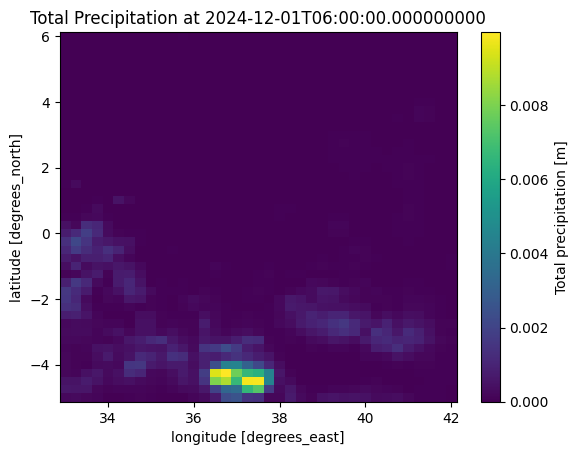

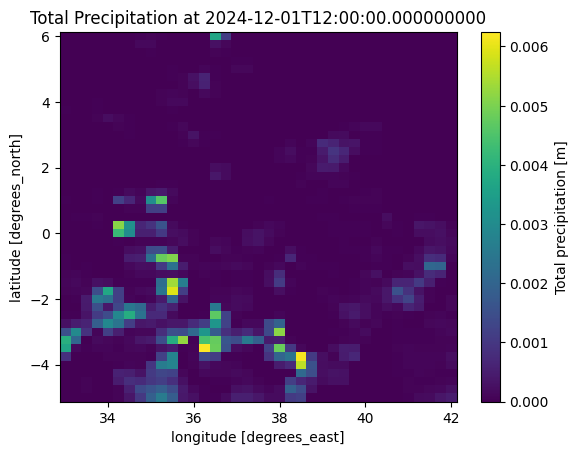

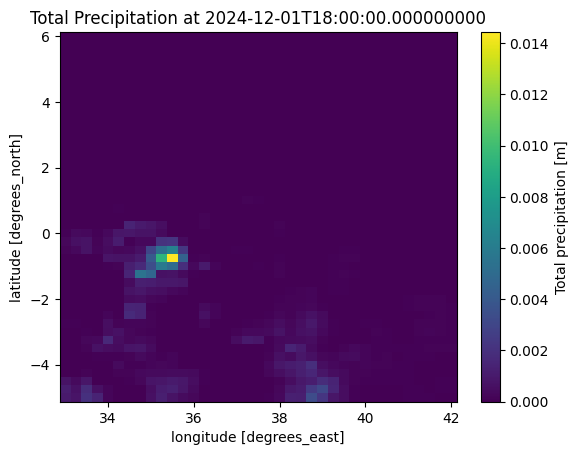

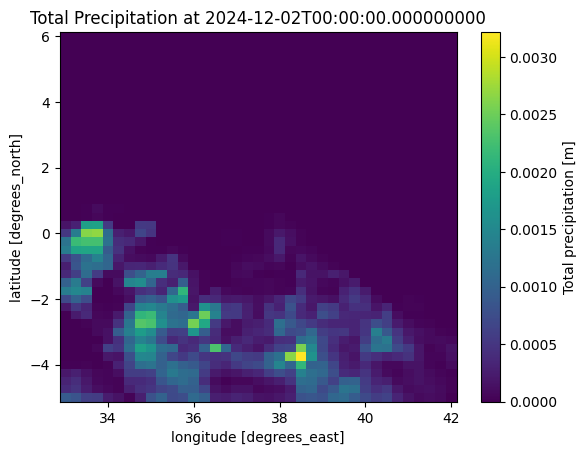

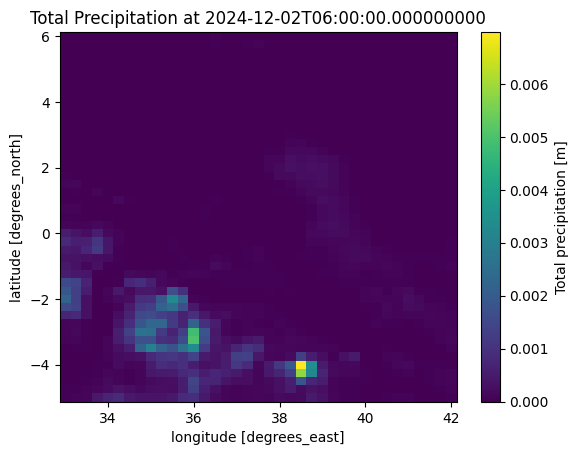

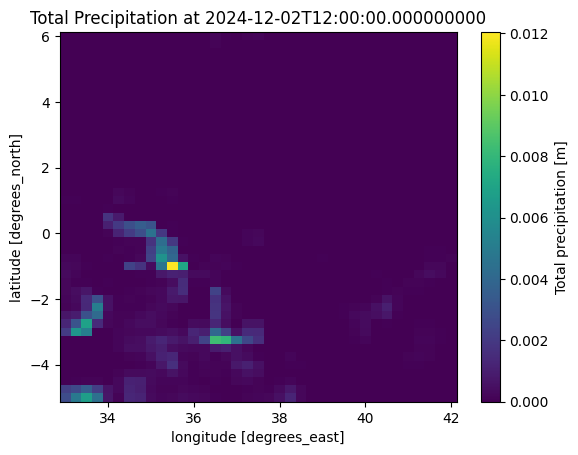

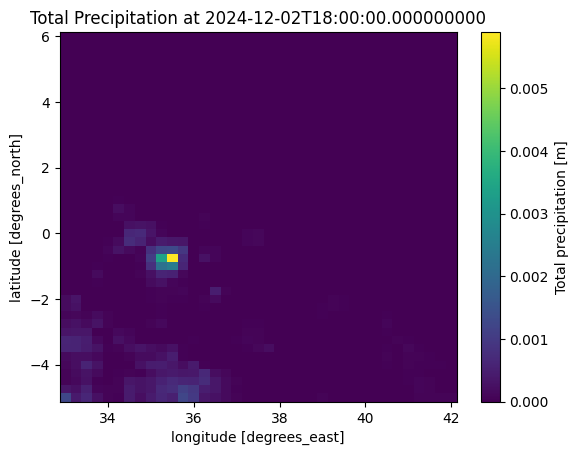

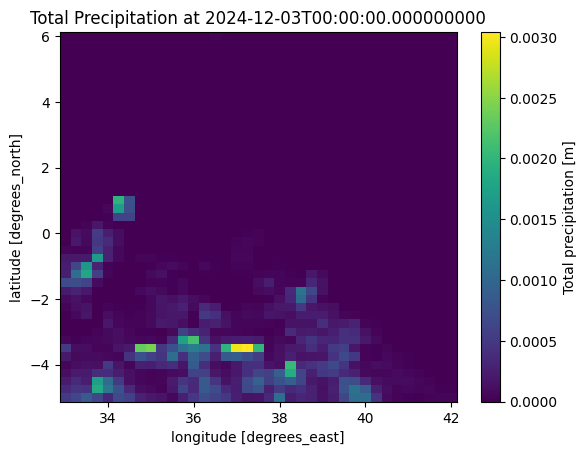

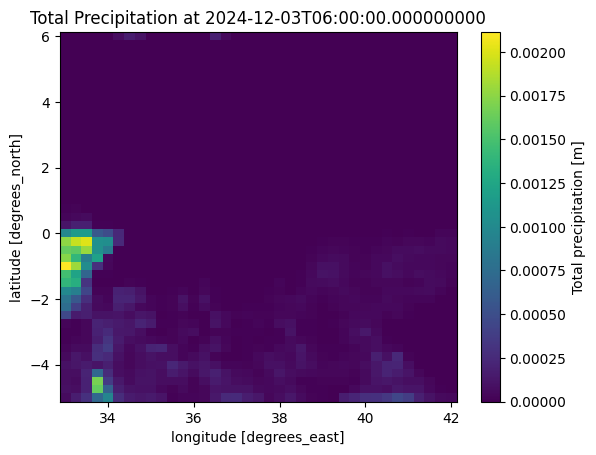

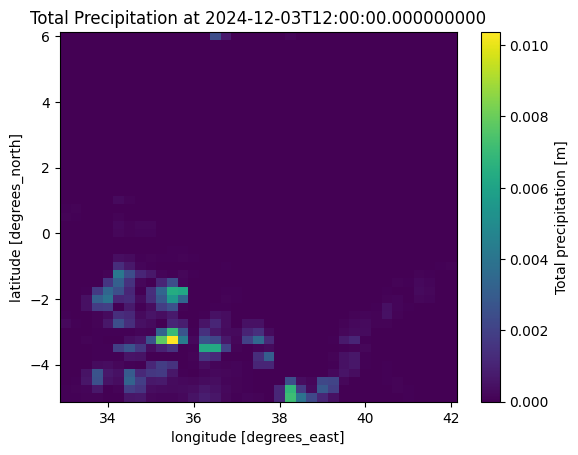

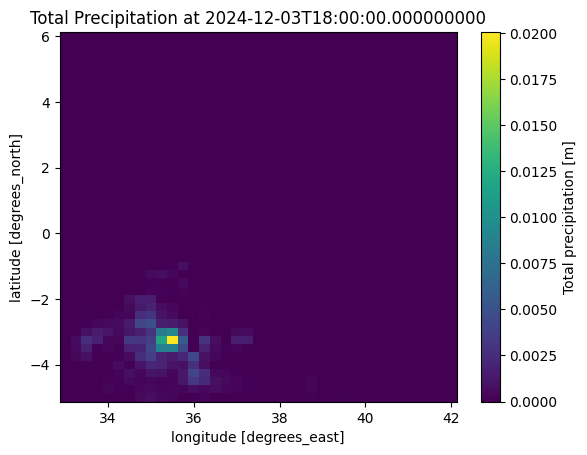

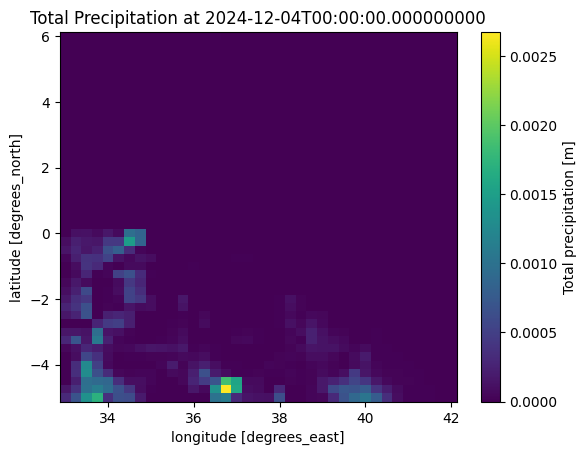

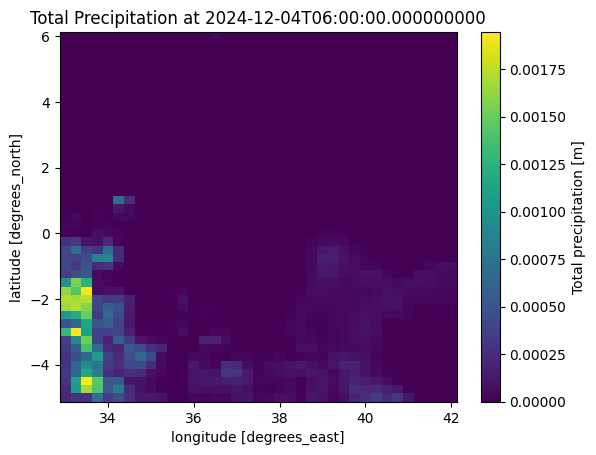

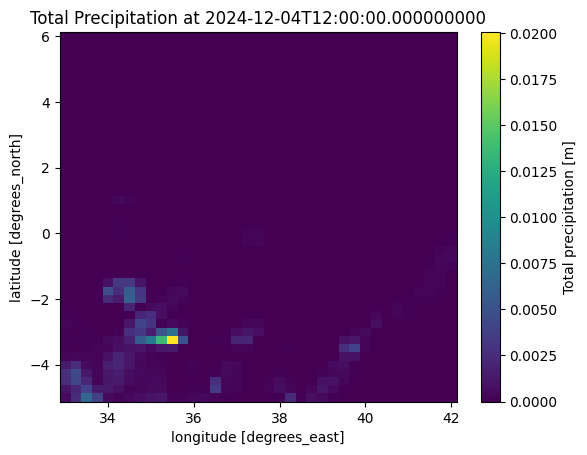

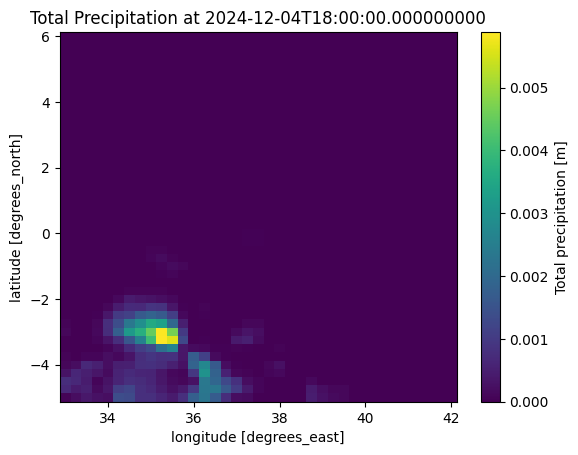

In [9]:
for i in range (len(ds["valid_time"])):
    ds["tp"].isel(valid_time=i).plot()
    plt.title(f"Total Precipitation at {ds['valid_time'].values[i]}")
    plt.show()

In [10]:
print(ds)

<xarray.Dataset> Size: 108kB
Dimensions:     (valid_time: 16, latitude: 45, longitude: 37)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 128B 2024-12-01 ... 2024-12-04T18...
  * latitude    (latitude) float64 360B 6.0 5.75 5.5 5.25 ... -4.5 -4.75 -5.0
  * longitude   (longitude) float64 296B 33.0 33.25 33.5 ... 41.5 41.75 42.0
    expver      (valid_time) <U4 256B ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 107kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-28T07:02 GRIB to CDM+CF via cfgrib-0.9.1...


In [11]:
ds["tp"].attrs

{'GRIB_paramId': np.int64(228),
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': np.int64(1665),
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': np.int64(1),
 'GRIB_stepType': 'accum',
 'GRIB_gridType': 'regular_ll',
 'GRIB_uvRelativeToGrid': np.int64(0),
 'GRIB_NV': np.int64(0),
 'GRIB_Nx': np.int64(37),
 'GRIB_Ny': np.int64(45),
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'tp',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': np.float64(0.25),
 'GRIB_iScansNegatively': np.int64(0),
 'GRIB_jDirectionIncrementInDegrees': np.float64(0.25),
 'GRIB_jPointsAreConsecutive': np.int64(0),
 'GRIB_jScansPositively': np.int64(0),
 'GRIB_latitudeOfFirstGridPointInDegrees': np.float64(6.0),
 'GRIB_latitudeOfLastGridPointInDegrees': np.float64(-5.0),
 'GRIB_longitudeOfFirstGridPointInDegrees': np.float64(33.0),
 'GRIB_longitudeOfLastGridPointInDegrees': np.float64(42.0),
 'GRIB_missingValue': np.float64(3.4028234663852886e+38),
 'GRIB_name': 'T

In [12]:
rain_mm = ds["tp"] * 1000

In [13]:
import numpy as np

In [14]:
for i in range (len(rain_mm["valid_time"])):
    mean_rain = rain_mm.isel(valid_time=i).mean().values
    print(f"Mean Rainfall at {rain_mm['valid_time'].values[i]}: {mean_rain} mm")

Mean Rainfall at 2024-12-01T00:00:00.000000000: 0.22719843685626984 mm
Mean Rainfall at 2024-12-01T06:00:00.000000000: 0.21928980946540833 mm
Mean Rainfall at 2024-12-01T12:00:00.000000000: 0.2329445481300354 mm
Mean Rainfall at 2024-12-01T18:00:00.000000000: 0.14345324039459229 mm
Mean Rainfall at 2024-12-02T00:00:00.000000000: 0.20264892280101776 mm
Mean Rainfall at 2024-12-02T06:00:00.000000000: 0.14632685482501984 mm
Mean Rainfall at 2024-12-02T12:00:00.000000000: 0.1815371960401535 mm
Mean Rainfall at 2024-12-02T18:00:00.000000000: 0.044295165687799454 mm
Mean Rainfall at 2024-12-03T00:00:00.000000000: 0.09322982281446457 mm
Mean Rainfall at 2024-12-03T06:00:00.000000000: 0.05129335820674896 mm
Mean Rainfall at 2024-12-03T12:00:00.000000000: 0.17468507587909698 mm
Mean Rainfall at 2024-12-03T18:00:00.000000000: 0.13683995604515076 mm
Mean Rainfall at 2024-12-04T00:00:00.000000000: 0.049904946237802505 mm
Mean Rainfall at 2024-12-04T06:00:00.000000000: 0.06329390406608582 mm
Mean R

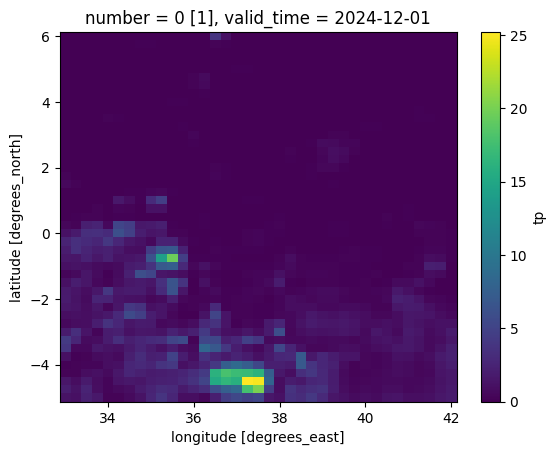

In [15]:
daily_rain = rain_mm.resample(valid_time="1D").sum()
daily_rain.isel(valid_time=0).plot()

In [16]:
nairobi_rain = daily_rain.sel(
    latitude = -1.29,
    longitude = 36.82,
    method= "nearest"
)

In [17]:
print(nairobi_rain)

<xarray.DataArray 'tp' (valid_time: 4)> Size: 16B
array([0.05722046, 0.09393692, 0.00905991, 0.00047684], dtype=float32)
Coordinates:
    number      int64 8B ...
    latitude    float64 8B -1.25
    longitude   float64 8B 36.75
  * valid_time  (valid_time) datetime64[ns] 32B 2024-12-01 ... 2024-12-04


In [18]:
df = nairobi_rain.to_dataframe(name="nairobi_rainfall_mm")

In [19]:
print(df)

            number  latitude  longitude  nairobi_rainfall_mm
valid_time                                                  
2024-12-01       0     -1.25      36.75             0.057220
2024-12-02       0     -1.25      36.75             0.093937
2024-12-03       0     -1.25      36.75             0.009060
2024-12-04       0     -1.25      36.75             0.000477


<Axes: xlabel='valid_time'>

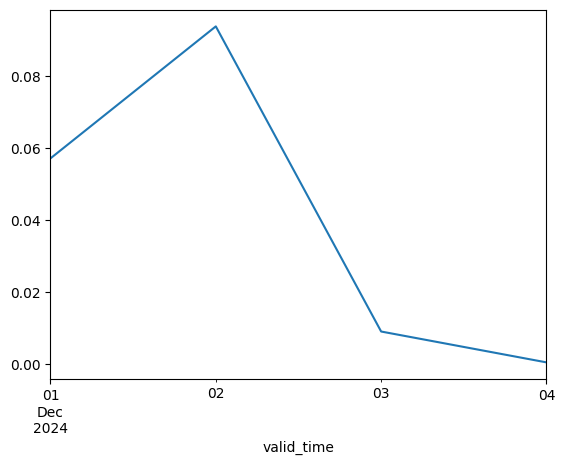

In [20]:
df["nairobi_rainfall_mm"].plot()

In [22]:
df["lag_yesterday"] = df["nairobi_rainfall_mm"].shift(1)
df

,number,latitude,longitude,nairobi_rainfall_mm,lag_yesterday
valid_time,,,,,
2024-12-01,0,-1.25,36.75,0.057220,NaN
2024-12-02,0,-1.25,36.75,0.093937,0.057220
2024-12-03,0,-1.25,36.75,0.009060,0.093937
2024-12-04,0,-1.25,36.75,0.000477,0.009060


In [23]:
df["3_day_cumulative"] = df["nairobi_rainfall_mm"].rolling(3).sum()
df

,number,latitude,longitude,nairobi_rainfall_mm,lag_yesterday,3_day_cumulative
valid_time,,,,,,
2024-12-01,0,-1.25,36.75,0.057220,NaN,NaN
2024-12-02,0,-1.25,36.75,0.093937,0.057220,NaN
2024-12-03,0,-1.25,36.75,0.009060,0.093937,0.160217
2024-12-04,0,-1.25,36.75,0.000477,0.009060,0.103474


In [24]:
df["wet_day"] = (df["nairobi_rainfall_mm"] >1).astype("int64")
df

,number,latitude,longitude,nairobi_rainfall_mm,lag_yesterday,3_day_cumulative,wet_day
valid_time,,,,,,,
2024-12-01,0,-1.25,36.75,0.057220,NaN,NaN,0
2024-12-02,0,-1.25,36.75,0.093937,0.057220,NaN,0
2024-12-03,0,-1.25,36.75,0.009060,0.093937,0.160217,0
2024-12-04,0,-1.25,36.75,0.000477,0.009060,0.103474,0


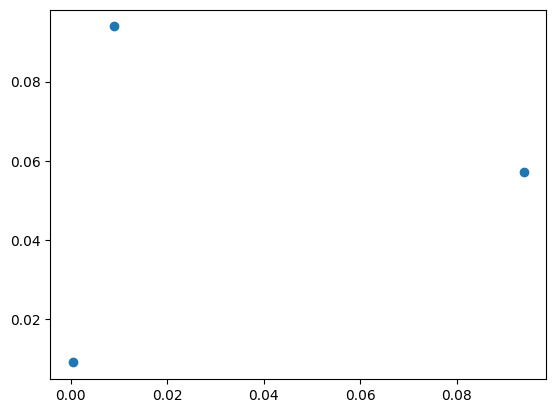

In [26]:
plt.scatter(df["nairobi_rainfall_mm"],df["lag_yesterday"])